In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib
from pathlib import Path
import os
import PIL
import pickle
import cv2
import PIL.Image
from skimage import io
from skimage.transform import resize
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image

In [10]:
# Loading Data And Defining Features And Labels
directory = Path("/content/drive/MyDrive/flowers")

flowers = []
features = []
labels = []

# Size Of The Image
size = 128,128


AttributeError: ignored

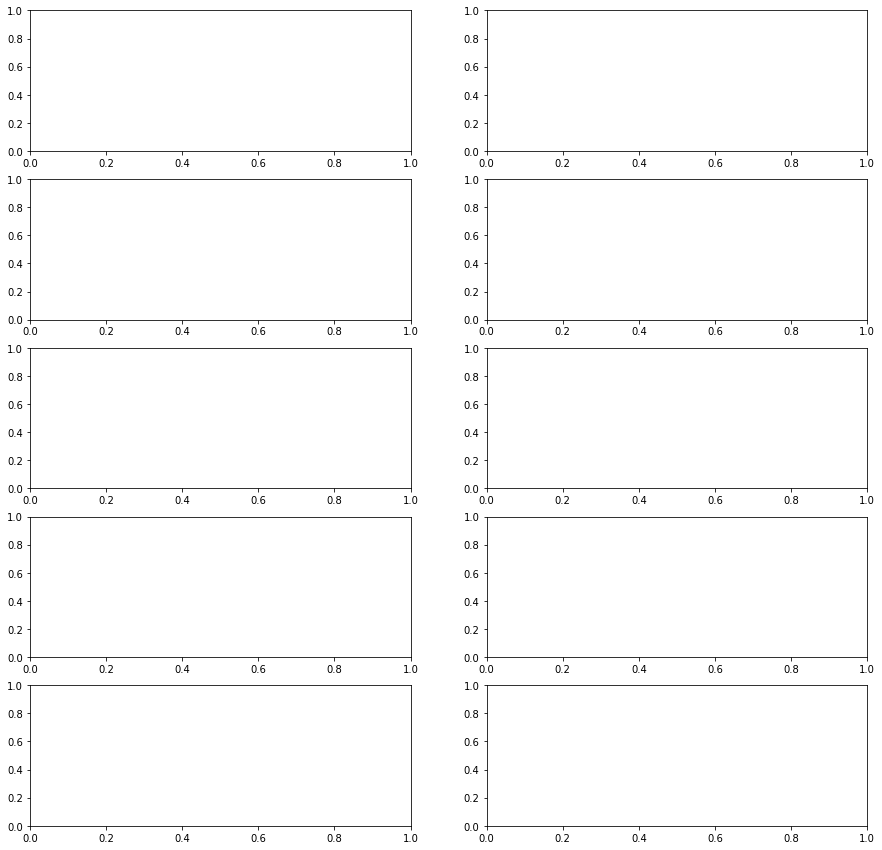

In [11]:
# Visualizing Some Random Flowers
import random
def draw_flower():
  fig,ax=plt.subplots(5,2)
  fig.set_size_inches(15,15)

  for i in range(5):
    for j in range(2):
      l = random.randint(0, len(labels))
      seq_img = features.squeeze()
      ax[i,j].imshow(seq_img[l])
      ax[i,j].set_title(labels[l])
  plt.tight_layout()

draw_flower()

In [ ]:
# Converting Features Into A Numpy Array
features = np.array(features)
features.shape

In [ ]:
# Converting Labels To A Numpy Array
labels = np.array(labels)
labels.shape

In [ ]:
# Splitting The Data Set Into Training And Testing Data
train_data, test_data, train_labels, test_labels = train_test_split(features, labels, test_size = 0.4, random_state = 42)

In [ ]:
# Checking Shape Of Training And Testing Data
print(train_data.shape)
print(train_labels.shape)
print(test_data.shape)
print(test_labels.shape)

In [ ]:
# Reshaping The Training And Testing Data
image_size = train_data.shape[1]
train_data = train_data.reshape((-1, image_size * image_size))
test_data = test_data.reshape((-1, image_size * image_size))

In [ ]:
# Scaling Training And Testing Data
train_data = train_data / 255.0
test_data = test_data / 255.0

In [ ]:
# Checking The Shape Again
print(train_data.shape)
print(test_data.shape)
print(train_labels.shape)
print(test_labels.shape)

In [ ]:
# One Hot Encoding Labels
le = LabelEncoder()
train_labels = le.fit_transform(train_labels)
test_labels = le.fit_transform(test_labels)

In [ ]:
print(train_labels.shape)
print(test_labels.shape)

In [ ]:
# Making Base Model
model = Sequential()
model.add(Dense(1024, activation = 'relu', input_shape = (train_data.shape[-1],)))
model.add(Dropout(0.02))
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.02))
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.02))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.02))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.02))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(5, activation = 'softmax'))
model.summary()

In [ ]:
# Compilation Step
model.compile(optimizer = Adam(0.001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
# Fitting Model On 80 Epochs
history = model.fit(train_data, train_labels, epochs = 80, batch_size = 128)

In [ ]:
# Plotting Model Loss On Training Data
plt.figure(figsize=(10,10))
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('Model Loss On Training Data')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Loss', 'Accuracy'])
plt.grid()
plt.show()

In [ ]:
# Making Predictions On Test Data
predictions = model.predict(test_data)
predictions

In [ ]:
# Evaluating Model On Test Data
testing = model.evaluate(test_data, test_labels)
testing